# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!
shares_data = {
    "Shares": [1.2, 5.3]
}

Crypto = ['BTC', 'ETH']

df_shares = pd.DataFrame(shares_data, index=Crypto)

df_shares

,Shares
BTC,1.2
ETH,5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [99]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_price = requests.get(btc_url).json()
btc_price = btc_price['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
# YOUR CODE HERE!

eth_price = requests.get(eth_url).json()
eth_price = eth_price['data']['1027']['quotes']['USD']['price']
# Compute current value of my crpto
my_btc= 1.2
my_eth= 5.3
# YOUR CODE HERE!

my_btc_value = btc_price*my_btc
my_eth_value = eth_price*my_eth

print(my_btc_value)
print(my_eth_value)

#print(eth, ['USD'])
# Print current crypto wallet balance
#print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
#print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

27394.8
9665.928


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [89]:
# Set current amount of shares
stock_data = {
    "Shares": [200, 50]
}

tickers= ['AGG', "SPY"]
stock_data= pd.DataFrame(stock_data, index=tickers)

my_agg = 200 
my_spy = 50
    
stock_data
              


,Shares
AGG,200
SPY,50


In [90]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
#alpaca_url = "https://app.alpaca.markets/"


# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,  
    api_version='v2')

In [91]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp('2022-08-17', tz='America/Phoenix').isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG

# YOUR CODE HERE!
Portfolio_closing_price= alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
).df

# Reorganize the DataFrame
Portfolio_closing_price = Portfolio_closing_price.drop(columns=['open', 'high', 'low', 'volume', 'trade_count', 'vwap'])
#Portfolio_closing_price = Portfolio_closing_price.set_index(['close'], inplace=True)
#Portfolio_closing_price
#Portfolio_closing_price.drop(columns=['close'])
#print(Portfolio_closing_price)

# Separate ticker data
# YOUR CODE HERE!

agg_close_price=Portfolio_closing_price[Portfolio_closing_price['symbol']=='AGG'].drop('symbol', axis=1)
spy_close_price = Portfolio_closing_price[Portfolio_closing_price['symbol']=='SPY'].drop('symbol', axis=1)

print(agg_close_price)
print(spy_close_price)
#print(Separated_Portfolio)
# Concatenate the ticker DataFrames
df_ticker = pd.concat([spy_close_price, agg_close_price], axis=1, keys=['SPY', 'AGG'])

# YOUR CODE HERE!

# Preview DataFrame
df_ticker
# YOUR CODE HERE!

                            close
timestamp                        
2022-08-18 04:00:00+00:00  102.71
                            close
timestamp                        
2022-08-18 04:00:00+00:00  427.89


,SPY,AGG
,close,close
timestamp,,
2022-08-18 04:00:00+00:00,427.89,102.71


In [92]:
# Pick AGG and SPY close prices
agg_close_price = float(df_ticker['AGG']['close'])
spy_close_price = float(df_ticker['SPY']['close'])
# YOUR CODE HERE!

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $102.71
Current SPY closing price: $427.89


In [93]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg*agg_close_price
my_spy_value = my_spy*spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21394.50
The current value of your 200 AGG shares is $20542.00


### Savings Health Analysis

In [100]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income= 12000
# Consolidate financial assets data
# YOUR CODE HERE!
my_crypto = my_btc_value+my_eth_value
my_shares = my_agg_value+my_spy_value
# Create savings DataFrame
# YOUR CODE HERE!
savings = {
    'amount': [my_shares, my_crypto],
    'Crypto': [my_crpto],
    'Stocks': [my_shares]
}
# Display savings DataFrame
df_savings= pd.DataFrame(savings, index=['crypto', 'shares'], columns=['amount'])
display(df_savings)

,amount
crypto,41936.500
shares,37060.728


<AxesSubplot:title={'center':'Total of Personal Savings'}, ylabel='amount'>

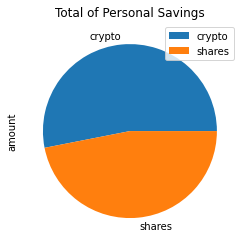

In [101]:
# Plot savings pie chart
df_savings.plot.pie(y='amount', title='Total of Personal Savings')
# YOUR CODE HERE!

In [103]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_amount_savings = my_shares + my_crypto
# Validate saving health
if total_amount_savings > emergency_fund:
    print('You have saved enough')
elif total_amount_savings < emergency_fund:
    print('Back to work your not quitting anytime soon, Dont get sick')
elif total_amount_savings == emergency_fund:
    print('Youve hit your savings goal! Congrats')
# YOUR CODE HERE!

You have saved enough


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [108]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [117]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
end_day = pd.Timestamp('2022-08-17', tz='America/Phoenix').isoformat()
five_years_ago = pd.Timestamp('2017-08-17', tz='America/Phoenix').isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1day"

# Get current closing prices for SPY and AGG

# YOUR CODE HERE!
df_stock_data= alpaca.get_bars(
    tickers,
    timeframe,
    start = five_years_ago,
    end = end_day
    
).df

# Reorganize the DataFrame
SPY = df_stock_data[df_stock_data['symbol'] == 'SPY'].drop('symbol', axis=1)
AGG = df_stock_data[df_stock_data['symbol'] == 'AGG'].drop('symbol', axis=1)
# Separate ticker data
# YOUR CODE HERE!


# Concatenate the ticker DataFrames
df_history_data = pd.concat([SPY, AGG], axis=1, keys=['SPY', 'AGG'])
# YOUR CODE HERE!

# Display sample data
df_history_data.head()

SPY                                      \
                             open     high     low   close     volume   
timestamp                                                               
2017-08-18 04:00:00+00:00  242.95  244.189  242.20  242.71  136747986   
2017-08-21 04:00:00+00:00  242.64  243.200  241.83  242.90   65469736   
2017-08-22 04:00:00+00:00  243.60  245.620  243.55  245.44   63140101   
2017-08-23 04:00:00+00:00  244.34  245.050  244.16  244.56   50203837   
2017-08-24 04:00:00+00:00  245.00  245.180  243.75  243.99   50741671   

                                                      AGG                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2017-08-18 04:00:00+00:00      389140  243.019365  110.05  110.14  109.89   
2017-08-21 04:00:00+00:00      231509  242.723675  110.01  110.09  109.97   
2017-08-22 04:00:00+00:00      225770  244.835231  109.99  110.02  109.87   
2017-08-23 04:00:00+00:00      162095  244.690966  110.08  110.19  110.01   
2017-08-24 04:00:00+00:00      196830  244.323684  110.07  110.16  109.99   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2017-08-18 04:00:00+00:00  109.95  1564794        7827  109.993232  
2017-08-21 04:00:00+00:00  110.03  1717640        7688  110.029578  
2017-08-22 04:00:00+00:00  109.93  1992321        8252  109.929751  
2017-08-23 04:00:00+00:00  110.18  1894934       10186  110.092715  
2017-08-24 04:00:00+00:00  110.04  2102142       10203  110.051035

In [131]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
years = 30

trading_days = 252

MCsim = MCSimulation(
    portfolio_data = df_history_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = trading_days
)
    


In [132]:
# Printing the simulation input data
# YOUR CODE HERE!
MCsim.portfolio_data.head()

SPY                                      \
                             open     high     low   close     volume   
timestamp                                                               
2017-08-18 04:00:00+00:00  242.95  244.189  242.20  242.71  136747986   
2017-08-21 04:00:00+00:00  242.64  243.200  241.83  242.90   65469736   
2017-08-22 04:00:00+00:00  243.60  245.620  243.55  245.44   63140101   
2017-08-23 04:00:00+00:00  244.34  245.050  244.16  244.56   50203837   
2017-08-24 04:00:00+00:00  245.00  245.180  243.75  243.99   50741671   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-08-18 04:00:00+00:00      389140  243.019365          NaN  110.05   
2017-08-21 04:00:00+00:00      231509  242.723675     0.000783  110.01   
2017-08-22 04:00:00+00:00      225770  244.835231     0.010457  109.99   
2017-08-23 04:00:00+00:00      162095  244.690966    -0.003585  110.08   
2017-08-24 04:00:00+00:00      196830  244.323684    -0.002331  110.07   

                                                                        \
                             high     low   close   volume trade_count   
timestamp                                                                
2017-08-18 04:00:00+00:00  110.14  109.89  109.95  1564794        7827   
2017-08-21 04:00:00+00:00  110.09  109.97  110.03  1717640        7688   
2017-08-22 04:00:00+00:00  110.02  109.87  109.93  1992321        8252   
2017-08-23 04:00:00+00:00  110.19  110.01  110.18  1894934       10186   
2017-08-24 04:00:00+00:00  110.16  109.99  110.04  2102142       10203   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-08-18 04:00:00+00:00  109.993232          NaN  
2017-08-21 04:00:00+00:00  110.029578     0.000728  
2017-08-22 04:00:00+00:00  109.929751    -0.000909  
2017-08-23 04:00:00+00:00  110.092715     0.002274  
2017-08-24 04:00:00+00:00  110.051035    -0.001271

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!


In [135]:
# Plot simulation outcomes
# YOUR CODE HERE!
MCsim.hvplot

AttributeError: 'MCSimulation' object has no attribute 'hvplot'

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")